In [ ]:
# think that maybe twitter stopped allowing sntwitter.TwitterSearchScraper to scrape after project completed

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [ ]:
import datetime # for datetime operations

In [ ]:
import re
import nltk # for stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


the attributes that you get back from TwitterHashtagScraper:<br>
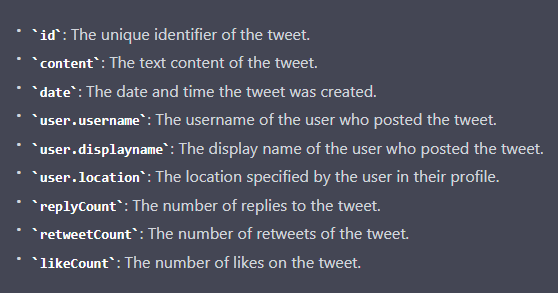

In [ ]:
def clean_tweet(text):
  cleaned_text = re.sub(r"http\S+", "", text) # remove urls \S is any non-whitespace character and + matches them all, needed to move this before removing some other things so that it removed all of url
  cleaned_text = cleaned_text.encode('ascii', 'ignore').decode('ascii') # remove all non-ascii characters, seems to work for removing all emojis
  cleaned_text = re.sub(r"@[a-zA-Z0-9]+", "", cleaned_text) # remove @whateverword 
  cleaned_text = re.sub(r"#[a-zA-Z0-9\s]+", "", cleaned_text) # remove #whateverhashtag
  cleaned_text = ' '.join(word for word in cleaned_text.split() if word not in stop_words) # remove all stop words
  cleaned_text = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), cleaned_text)) # remove all punctuation

  return cleaned_text

In [ ]:
# construct array of dates to get one after the other    
dates_to_scrape = []
for day in range(24, 25): # specify range of days to scrape
    one_date = datetime.date(2023, 1, day) # specify month to scrape
    dates_to_scrape.append(one_date)

In [ ]:
print(dates_to_scrape)

[datetime.date(2023, 1, 24)]


In [ ]:
# get all stop words into variable (only getting english stop words)
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# function to scrape one day, clean each tweet, and write to csv file
def scrape_one_day_bitcoin_tweets(date):
    # set search query and date range
    search_query = "bitcoin"

    # start and end time range for one day to scrape
    since_date = date
    until_date = date + datetime.timedelta(days=1)
    
    print(f"date: {date}, since_date: {since_date}, until_date: {until_date}")
    
    # make sntwitter library call to scrape one day's worth of tweets filtered by hashtag of the search_query bitcoin
    bitcoin_scraper_just_1_day = sntwitter.TwitterHashtagScraper(f"{search_query} since:{since_date} until:{until_date}")

    tweets = [] # array to save all tweets in
    for i, tweet in enumerate(bitcoin_scraper_just_1_day.get_items()):
      # specifying the fields that you want to save: date, id, content, username, like count, retweet count
      data = [tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.retweetCount] 
      if i < 10000000: # just setting a really high max # of tweets in case for some reason it just keeps fetching data (never did btw)
        tweets.append(data)
      else:
        break
    print(len(tweets))
    
    # put tweets into dataframe, assign column names 
    bitcoin_scraper_just_1_day = pd.DataFrame(tweets, columns=['datetime', 'id', 'content', 'username', 'num_likes', 'num_retweets'])
    bitcoin_scraper_just_1_day.head()
    
    # get all stop words into variable
    stop_words = stopwords.words('english') # only got english stop words
    print(stop_words)
    
    # clean each tweet remove urls, all non-ascii characters, user mentions @user, hashtags, english stop words, punctuation
    bitcoin_scraper_just_1_day['content'] = bitcoin_scraper_just_1_day['content'].apply(clean_tweet)
    bitcoin_scraper_just_1_day.head()

    # creating file name to save the day's worth of tweets to    
    filename = "bitcoin_just_" + date.strftime("%m"+"."+"%d"+"."+"%Y") + ".csv"
    bitcoin_scraper_just_1_day.to_csv(filename)    

In [ ]:
# scrape all of the dates specified in the dates_to_scrape array
for date in dates_to_scrape:
    scrape_one_day_bitcoin_tweets(date)

date: 2023-01-24, since_date: 2023-01-24, until_date: 2023-01-25


ERROR:snscrape.base:Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%23bitcoin+since%3A2023-01-24+until%3A2023-01-25&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&incl

ScraperException: ignored